![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

# <span style="color:red">Predicting US Presidential Election Result Using Twitter Sentiment Analysis</span> 

According to [Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis), sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

Sentiment analysis is used by a number of data analytics companies on a variety of subjects. Some of the popular markets where it is used are:

- Business: Sentiment analysis in business can prove a major breakthrough for the complete brand revitalization. The key to running a successful business with the sentiments data is the ability to exploit the unstructured data for actionable insights. The marketing team of many companies use it to create business strategies, to understand how customers perceive their product and to understand customer behavior in order to improve sales.

- Politics: In the political field, it is used to keep track of regions where the candidate is favourable and work towards regions where the candidate is not favourable in order to improve their chances in an election.

The US presidential election was on November 3 and it seems like a good idea to understand the mood and public opinion in different US states towards the candidates: current Republican President Donald Trump and the Democratic challenger Joe Biden.

When you think of politicians and Twitter, chances are President Donald J. Trump comes to mind. Ever since he launched his run for office in 2015, Trump has become infamous for what many have described as derogatory, negative, and somewhat inflammatory tweets. Turns out that with even as little as 280 characters, he can communicate a whole spectrum of emotions, facts, and opinions. This [article](https://www.nytimes.com/interactive/2019/11/02/us/politics/trump-twitter-presidency.html) published by NYT in 2019 ilustrates this.

The dramatic increase in the number of users on social media platform leads to the generation of huge amount of unstructured text in the form of messages, chats, posts and blogs. Besides the exchange of information, social media is a remarkably convenient medium to express the ideas and opinions which gain popularity when liked by a large set of users. This popularity may reflect the sentiment of people towards that person, organization or a place.

The social media platform, such as Twitter, generates huge amounts of the text containing political insights, which can be mined to analyze the people’s opinion and predict the future trends in the elections.

For this analysis, I collected tweets a week before the election day (since October 26th) using the publicly available Twitter API and performed a sentiment analysis of those tweets using VADER Sentiment Analysis.

First of all we need to install Tweepty, an easy-to-use Python library for accessing the Twitter API.

Tweepy supports both OAuth 1a (application-user) and OAuth 2 (application-only) authentication. Authentication is handled by the tweepy.AuthHandler class.

Tweepy tries to make OAuth 1a as painless as possible for you. To begin the process we need to register our client application with Twitter. Create a new application and once you are done you should have your consumer key (api_key) and secret (api_secret_key). Keep these two handy, you’ll need them.

In [220]:
#!pip install tweepy

__Tools__

- csv — implements classes to read and write tabular data in csv format
- tweepy — a type of RESTful API specifically for Twitter
- ssl — provides access to Secure Sockets Layer encryption and peer authentication facilities for network sockets, both client-side and server-side
- pandas — data manipulation and analysis library
- os — provides a portable way of using operating system dependent functionality
- re — provides regular expression matching operations similar to those found in Perl
- nltk — leading platform for building python programs to work with human language data


This project is majorly divided into 3 parts

- __Part 1: dataset creation__
- __Part 2: sentiment analysis__
- __Part 3: conclusions__

### <span style="color:red">Part 1: dataset creation</span>

In order to use the Twitter API, we need to have a Twitter Developer Account which gives us access to an access token, an access token secret, an api key and an api secret key. I have noted these parameters inside a properties file which I placed inside the final project folder. I used python's configparser to read those data in order to use the twitter API.

__Step 1:__ Register and create a [Twitter Developer Account](https://developer.twitter.com/en/apply-for-access) Twitter Developer Account for API

__Step 2:__ Go to developer dashboard and click projects and apps and then click keys icon

<img src="img1.png" width="800">

__Step 3:__ Copy “API Key”, “API Secret”, “Access Token”, and “Access Token Secret”

<img src="img2.png" width="600">

__Note:__ Keep these keys safe and private, also Consumer Key is same as API Key.

__Step 4:__ Import Tweepy, CSV, SSL

In [242]:
import csv
import tweepy as tw
import ssl
import pandas as pd
import os

__Step 5:__ Enter your Oauth credentials

In [244]:
api_key = "xnreI7SKuUoVwuiyaj8V3qoiM"
api_secret_key = "Q1hk1nXYYCHPzS50xVOZFJWxtgOansSxTaXnHx1ViiB8Dxj7OV"
access_token = "325276778-wEWgQ2QfwtBGFn84CwDnXLk9pBDe8nOdhhZ4xtTH"
access_token_secret = "UJ9INmrqB8vjXgTfHpQogYRBFcafJadowiIEH8WhaSPvn"

__Step 6:__ Setup Authentication with Twitter. Using [OAuthHandler](http://docs.tweepy.org/en/latest/auth_tutorial.html) instance passes the credentials to allow access to Twitter’s API features.

In [245]:
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

__Note:__ In order to check if Twitter API is working or not you could add:

In [246]:
user = api.me()
print (user.name)

popi


Popi is my nickname :) my friends call me that. The API.me() method of the API class in Tweepy module is used to get the authenticated user’s information.

__Step 7:__ Twitter uses pagination in their API development. In order to perform pagination, Twitter supplies a page/cursor parameter with each of their requests. As a result, this requires a lot of code just to manage the pagination loop. To help make pagination easier and require less code the Twitter API or Tweepy has the Cursor object.

Since the Cursor is passed callable, we can not pass the parameters directly into the method. Instead the parameters are passed into the Cursor constructor method. For the API to search tweets, we pass the following parameters:

_q_: This is the keyword to be searched in the tweet. For our project, we pass the name of the candidate (Donald Trump/Joe Biden).

_lang_: This is the language of the tweets we want to retrieve from the API. Since USA is largely an English-speaking country with English also being the official language, we retrieve tweets made in English.

_since_: This is the date from which we want to retrieve tweets. For our purposes, we are interested in the political discourse 1 week before (election was on 3th of November) to understand the mood on of the elections. So we pass this as Monday 26th of November.

__Note:__ We need to keep in mind that due to [documentation of Twitter's search endpoint](https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators) the Search API is not a complete index of all Tweets, but instead an index of recent Tweets. The search index has a 7-day limit. In other words, no tweets will be found for a date older than one week. Another factor which needs to be kept in mind is the tweepy search api retrieves a maximum of 1500 tweets at a time followed by a cooldown period of 15 minutes.

In [247]:
search_words = "Joe Biden" # This will be changed to Donald Trump when we retrieve tweets related to him.
date_since = "2020-11-26"

__Note:__ Another factor which needs to be kept in mind is the tweepy search api retrieves a maximum of 1500 tweets at a time followed by a cooldown period of 15 minutes.

In [248]:
tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since).items(100)

In [249]:
tweets

__Step 8:__ The result of the search API call is a cursor item iterator object. From this iterator object, we iterate through pick up the geo, text, username and location details. Some details like geo and location are dependent on whether the particular user is sharing these details or not. If the user is not sharing these details, we will get blank data for these columns.

Afterwards, we convert our list to a pandas dataframe.

In [250]:
tweet_details = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [251]:
tweet_df = pd.DataFrame(data=tweet_details, columns=["geo","text","user","location"])

We set the value of the specified option

In [252]:
pd.set_option('max_colwidth',800)
tweet_df.head(20)

,geo,text,user,location
0,None,RT @AriBerman: Hawaii has cast 4 electoral votes for Joe Biden &amp; 306 electoral votes now finalized,GiGicmka,
1,None,"RT @AP: BREAKING: Democrat Joe Biden clears 270-vote threshold in Electoral College count, formalizing his victory in the presidential elec…",Viridis39,
2,None,RT @ggreenwald: Reminder: it was Joe Biden who called every country considering giving asylum to Snowden &amp; threatened them not to do it.…,MADdelaRosa,"San Francisco, CA"
3,None,Lair Bear 🐻 Hogan of Maryland going to appear on CNN and talk electoral votes - Drs. Joe and Jill Biden did a zoom… https://t.co/sHR7NRnR9I,madhadder11,
4,None,RT @MSNBC: BREAKING: The Electoral College on Monday officially votes for Joe Biden as the next president of the United States. https://t.c…,kmfrazie3,Arizona
5,None,It's really not fair that Joe Biden gets to give a victory speech this many times.\n \nA true deviation from historical norms.,thebishopofcalc,Tennessee
6,None,RT @SenatorBaldwin: Trump lost popular vote.\nLost with US Supreme Court.\nLost with a Wisconsin federal judge he appointed.\nLost with the Wi…,BrudderClyde,"Kingston, Ontario"
7,None,"RT @ryanstruyk: The Electoral College has cast more than 270 votes for President-elect Joe Biden, formally handing him the majority needed…",_asatterfield,"spencerville, oh"
8,None,RT @AriBerman: Hawaii has cast 4 electoral votes for Joe Biden &amp; 306 electoral votes now finalized,AlimiBallard,
9,None,"""In this battle for the soul of America, Democracy prevailed.""\n--Joe Biden, PRESIDENT-ELECT",donwinslow,Repped by The Story Factory


__Step 9:__ Looking at the tweets, we notice that there are lot of characters which do not add any value towards sentiment analysis. Many of the tweets are preceeded with RT which indicates the tweet was retweeted. The tweets are also preceeded with the name of the user from whom the tweet was retweeted which is also an information we are not concerned. We also remove any html website links which maybe present inside the tweet. All of these data cleaning are done with the help of the re built-in package of Python and regular expressions.

In [253]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

We select the specific column to apply the condition

In [254]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df['Subject'] = search_words
tweet_df.head(50)

,geo,text,user,location,Subject
0,None,Hawaii has cast 4 electoral votes for Joe Biden &amp; 306 electoral votes now finalized,GiGicmka,,Joe Biden
1,None,"BREAKING: Democrat Joe Biden clears 270-vote threshold in Electoral College count, formalizing his victory in the presidential elec…",Viridis39,,Joe Biden
2,None,Reminder: it was Joe Biden who called every country considering giving asylum to Snowden &amp; threatened them not to do it.…,MADdelaRosa,"San Francisco, CA",Joe Biden
3,None,Lair Bear 🐻 Hogan of Maryland going to appear on CNN and talk electoral votes - Drs. Joe and Jill Biden did a zoom…,madhadder11,,Joe Biden
4,None,BREAKING: The Electoral College on Monday officially votes for Joe Biden as the next president of the United States. …,kmfrazie3,Arizona,Joe Biden
5,None,It's really not fair that Joe Biden gets to give a victory speech this many times. A true deviation from historical norms.,thebishopofcalc,Tennessee,Joe Biden
6,None,Trump lost popular vote.Lost with US Supreme Court.Lost with a Wisconsin federal judge he appointed.Lost with the Wi…,BrudderClyde,"Kingston, Ontario",Joe Biden
7,None,"The Electoral College has cast more than 270 votes for President-elect Joe Biden, formally handing him the majority needed…",_asatterfield,"spencerville, oh",Joe Biden
8,None,Hawaii has cast 4 electoral votes for Joe Biden &amp; 306 electoral votes now finalized,AlimiBallard,,Joe Biden
9,None,"""In this battle for the soul of America, Democracy prevailed.""--Joe Biden, PRESIDENT-ELECT",donwinslow,Repped by The Story Factory,Joe Biden


__Step 10:__ In this analysis, we are mostly concerned with finding the political mood of each and every US state currently from the twitter data. In order to do this, we need to do some more filtering with the original data which we extracted from the tweepy API. As we discussed before, the tweepy API provides us with the location of the user who made the tweet provided he/she is sharing this information with us. This location data is mostly blank. For others, it may consist of the country name only, city name only or the city and state separated by a comma and so on.

In the next part, we form a list of US states and another list of US state codes in order to extract tweets which contain these in the location record.

In [255]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [256]:
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

__Step 11:__ At the end, we append the cleaned data to an existing csv file to create a corpus of twitter data on which we will use our sentiment analyser.

In [ ]:
tweet_copied_df.to_csv('tweets_election.csv', header=False, mode='a')

# <span style="color:red">Part 2: sentiment analysis</span> 

__Step 1:__ For sentiment analisis We use the VADER Sentiment Analyzer. According to C.J. Hutto [GitHub repo](https://github.com/cjhutto/vaderSentiment), who is one of the model creators, VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

[NLTK](https://www.nltk.org) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

In [257]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pablo.dellacassa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example words like 'love', 'enjoy', 'happy', 'like' all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as 'did not love' as a negative statement. It also understands the emphasis of capitalization and punctuation, such as 'ENJOY'.

VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:

- negative
- neutral
- positive
- compound (computed by normalizing the scores above)

In [258]:
sid = SentimentIntensityAnalyzer()

__Step 2:__ Next up, we separate out the tweets of the two candidates into separate dataframes.

In [259]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
0,NaN,"After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting and led to…",wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because the number is almost nothing because we've gott…",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to undermine your right to vote safely in…,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has done more to elect…,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [260]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
2928,NaN,Unfortunately she along with other politicians will never receive the justice they…,gmollo1115,"Georgia, USA",Joe Biden,Georgia
2929,NaN,Let’s talk about the Hunter laptop and such. Oh wait Biden blindness won’t allow that. Dirty joe....,mcritter61,"Houston, TX",Joe Biden,Texas
2930,NaN,Fun to think about how we learned today that Trump and Barr did with Turkey the exact thing Trump and his fans are falsely…,1kingsbay,"on the river, FL",Joe Biden,Florida
2931,NaN,"Larry Kudlow: Joe Biden's economic plan would crush US economy, decimate jobs.",JanedgeJanis,"Texas, USA",Joe Biden,Texas
2932,NaN,"A 64-page document asserting an elaborate conspiracy theory involving Joe Biden's son and business in China, that was later di…",denopotter,"Dallas, TX",Joe Biden,Texas


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

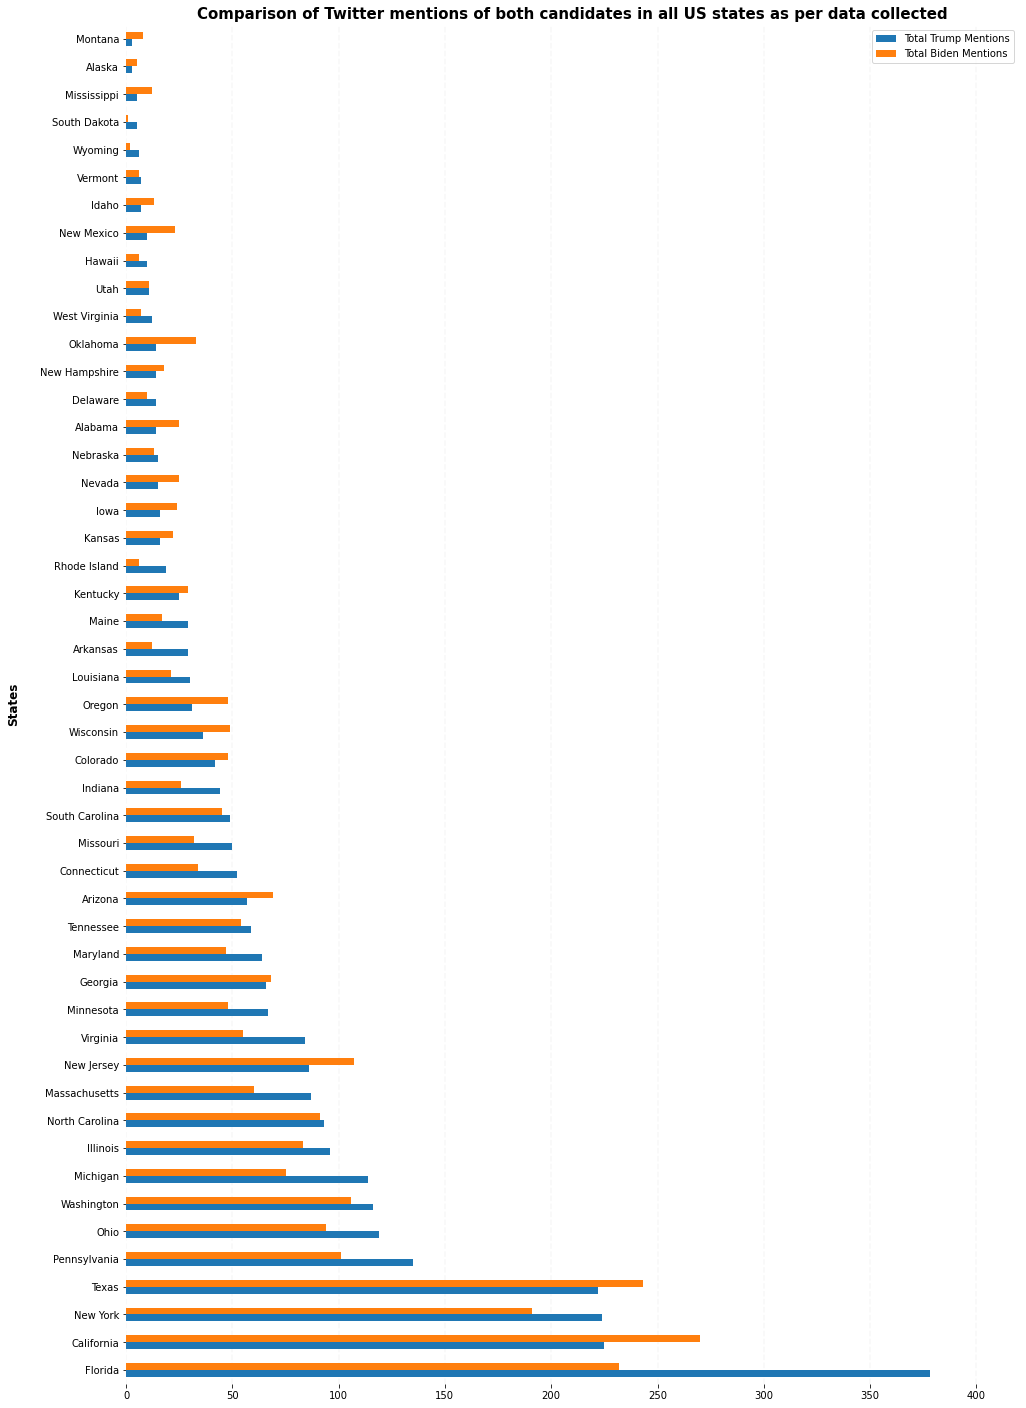

In [261]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

The above graphic shows a huge shortcoming of the analysis. The dataset, like many other datasets is not a well distributed. This means we have some states like Florida, California, Texas which have more data than others. Also, it seems that the amount of data related to Trump exceeds Biden's data by a small margin.

__Step 3:__ We proceed with our sentiment analysis now. To start off, we apply the polarity_scores() method to every tweet text in order to understand the sentiment of the tweet. The result of this method call is a dictionary showing the intensity of negative, neutral and positive sentiment in the tweet. All these three values are used to create the fourth figure which is the overall compound sentiment of the tweet. We will use this figure to judge whether the sentiment of a tweet is positive, negative or neutral.

In [262]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

<ipython-input-262-bd698c315da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-262-bd698c315da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))


In [263]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [264]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(20)

<ipython-input-264-5abfc56d60c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,"After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting and led to…",wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4939}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'compound': -0.5267}",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because the number is almost nothing because we've gott…",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0772}",Positive
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to undermine your right to vote safely in…,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'compound': -0.196}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has done more to elect…,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'compound': 0.0516}",Positive
5,NaN,'A vote for Donald Trump is a vote against the very ideals upon which our democracy was founded': Popovich endorses…,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.2716}",Positive
6,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has done more to elect…,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'compound': 0.0516}",Positive
7,NaN,"The same people who are outraged at AOC for slipping into a borrowed $14,000 outfit for a Vanity Fair photo shoot are…",SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'compound': -0.6705}",Negative
8,NaN,Donald Trump is on track to become the worst jobs president in modern American history.,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.6249}",Negative
9,NaN,"It is Friday, October 30, 2020. One citizen, I call for the removal from office by any legal means, the impeached f…",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.128}",Positive


In [265]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

<ipython-input-265-110e7736d739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
2928,NaN,Unfortunately she along with other politicians will never receive the justice they…,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.6341}",Negative
2929,NaN,Let’s talk about the Hunter laptop and such. Oh wait Biden blindness won’t allow that. Dirty joe....,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'compound': -0.25}",Negative
2930,NaN,Fun to think about how we learned today that Trump and Barr did with Turkey the exact thing Trump and his fans are falsely…,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.5106}",Positive
2931,NaN,"Larry Kudlow: Joe Biden's economic plan would crush US economy, decimate jobs.",JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}",Negative
2932,NaN,"A 64-page document asserting an elaborate conspiracy theory involving Joe Biden's son and business in China, that was later di…",denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.5267}",Negative
2933,NaN,"He is a profoundly decent man: a man of faith and compassion; willing to listen, capable of evolving, and able to admit…",afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8126}",Positive
2934,NaN,"Every CNN show should end with ""I'm Joe Biden, and I approved this message.""",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}",Positive
2935,NaN,"Rest assured, that’s my best friend who wrote the article and I know he’d never vote for someon…",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'compound': 0.872}",Positive
2936,NaN,"Winston Churchill’s granddaughter, Edwina Sandys, joins the fight.""I rarely wade into the political waters, but this y…",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2937,NaN,"If Sleepy Joe Biden is actually elected President, the 4 Justices (plus1) that helped make such a ridiculous win possi…",weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'compound': 0.3182}",Positive


__Step 4:__ Now that we have classified every tweet data as either positive, negative or neutral, we can group by state and understand the general opinion of the public of that state regarding a particular candidate.

In [266]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative               4
                Neutral                3
                Positive               7
Alaska          Neutral                1
                Positive               2
Arizona         Negative              17
                Neutral               20
                Positive              20
Arkansas        Negative               6
                Neutral               12
                Positive              11
California      Negative              87
                Neutral               51
                Positive              87
Colorado        Negative              14
                Neutral                9
                Positive              19
Connecticut     Negative              19
                Neutral               17
                Positive              16
Delaware        Negative               4
                Neutral                6
                Positive               4
Florida         Negativ

In [267]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              10
                Neutral                9
                Positive               6
Alaska          Negative               2
                Neutral                1
                Positive               2
Arizona         Negative              24
                Neutral               18
                Positive              27
Arkansas        Negative               3
                Neutral                4
                Positive               5
California      Negative             115
                Neutral               68
                Positive              87
Colorado        Negative              17
                Neutral               13
                Positive              18
Connecticut     Negative              13
                Neutral               11
                Positive              10
Delaware        Negative               4
                Neutral                3
                Positiv

In [268]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,30,35,57,39,35,26,69
Arkansas,38,21,41,29,42,25,33,12
California,39,39,23,225,32,43,25,270
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,34,29,378,31,31,37,232


__Step 5:__ To wrap up the analysis, we use the above analysis to classify whether a state is one of hthe following:

- __Strongly Republican:__ The number of positive tweets on Trump exceeds the same for Biden and the number of negative tweets on Trump is less than that of Biden or the number of tweets where the sentiment is neutral to Trump is more than that of Biden.
- __Strongly Democratic:__ The number of positive tweets on Biden exceeds the same for Trump and the number of negative tweets on Biden is less than that of Trump or the number of tweets where the sentiment is neutral to Biden is more than that of Trump.
- __Somewhat Republican:__ The margin between positive Trump tweets and positive Biden tweets is more than the margin for negative tweets.
- __Somewhat Democratic:__ The margin between positive Trump tweets and positive Biden tweets is less than the margin for negative tweets.
- __Insufficient Data:__ States in which the number of tweets made on either contestant is less than 15.

In [269]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Strongly Republican
Alaska,67,0,33,3,40,40,20,5,Insufficient Data
Arizona,35,30,35,57,39,35,26,69,Somewhat Democratic
Arkansas,38,21,41,29,42,25,33,12,Somewhat Democratic
California,39,39,23,225,32,43,25,270,Strongly Republican
Colorado,45,33,21,42,38,35,27,48,Strongly Republican
Connecticut,31,37,33,52,29,38,32,34,Strongly Republican
Delaware,29,29,43,14,30,40,30,10,Insufficient Data
Florida,37,34,29,378,31,31,37,232,Somewhat Republican


In [270]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data      13
Somewhat Democratic    10
Somewhat Republican     7
Strongly Democratic     6
Strongly Republican    14
dtype: int64

# <span style="color:red">Part 3: conclusions</span> 

From the results of the analysis, it seems as per current sentiment, the Republicans have a 21 (Strongly Republican + Somewhat Republican) - 16 (Strongly Democratic + Somewhat Democratic) lead. However, the opinion of the 13 states whose sentiment I was unable to figure out due to insufficient data can have a significant swing in fortunes for either side.

However, the final results of the elections showed that the analysis was unaccurate, the main cause probably is that the activity that Trump's followers have had on Twitter during the electoral period.

This analysis has some shortcomings:

- The distribution of the data is poor. I pointed this out earlier during my analysis and I feel that this may have included some bias in my analysis. Ideally, we should have same number of tweets for all states for both candidates. But in the real world, this is difficult to achieve if not impossible. However, an area of improvement is including some distribution models to get my dataset towards an uniform distribution of states.
- The location identification part of the analysis needs improvement. As discussed earlier, ideally the location of the tweet can be fed to the Google Maps API to get the state from where the tweet was made if it is from the United States.